# Basics of Cluster Analysis

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [24]:
#import the data
df = pd.read_csv('Countries_exercise.csv')
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [27]:
df.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


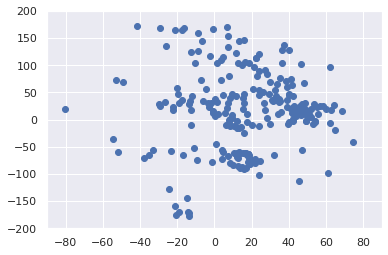

In [28]:
#plotting the data
plt.scatter(df['Latitude'],df['Longitude'])
plt.ylim(-200,200)
plt.xlim(-90,90)
plt.show()

<h4>Select the features

In [29]:
#here the features are lattitude and longitude
X = df.iloc[:,1:3]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


<h4>Clustering process

In [52]:
#kmeans = KMeans(no.of clusters requred)
kmeans = KMeans(5)

In [41]:
kmeans.fit(X)

KMeans(n_clusters=4)

<h4>Analyze the clustering results

In [53]:
identified_cluster = kmeans.fit_predict(X)
identified_cluster

#here we have 2 different clusters identified as 0 and 1.

array([2, 3, 3, 2, 0, 0, 0, 3, 2, 0, 4, 3, 1, 3, 2, 1, 0, 0, 3, 0, 0, 0,
       1, 0, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 2, 1, 0, 3,
       3, 3, 4, 2, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 3,
       0, 0, 3, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2,
       1, 2, 1, 3, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0,
       1, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 1, 0, 2, 4, 0, 0, 1, 1, 1, 3, 3, 2, 4, 2, 1, 1, 1, 0, 2,
       1, 0, 2, 0, 4, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 2, 3, 1, 0, 2, 0, 3,
       3, 2, 0, 3, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 0, 1, 3, 3, 1, 4, 2, 0,
       0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 1, 1, 4, 4, 3, 3, 3, 3],
      dtype=int32)

In [54]:
#merge the cluster result to the dataset
cluster_data = df.copy()
cluster_data['Cluster'] = identified_cluster
cluster_data

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


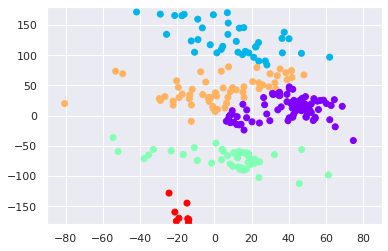

In [55]:
#Let's plot data as a cluster
plt.scatter(cluster_data['Latitude'],cluster_data['Longitude'],c=cluster_data['Cluster'],cmap = 'rainbow')
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.show()

#Finding the optimal number of Clusters using Elbow Method


WCSS => It is a measure developed with ANOVA FrameWork.
Expanded as Within Cluster Sum of Squares
The minimum number of clusters can be found from the plot of WCSS v/s No.of Clusters

In [46]:
#WCSS value can be obtained by:
kmeans.inertia_

256595.22356029777

In [47]:
X.shape[0]

241

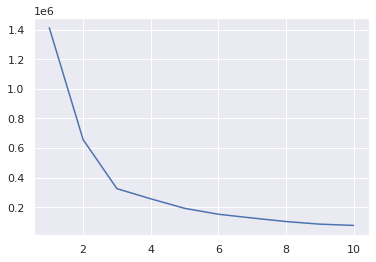

In [51]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_val = kmeans.inertia_
  wcss.append(wcss_val)

NOC = np.arange(1,11)

plt.plot(NOC,wcss)
plt.show()

#from this we can see that the best result will be given when number of cluster is 5
